In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

# Part 1: Measuring spring constants
For the three (supposedly identical) spring, we're measuring the displacement using a meter stick while increasing mass from 50g to 130g in steps of 20g (5 measurements).

In [8]:
spring_1_mass = np.array([50, 70, 90, 110, 130])*1E-3 # in kg
spring_1_displacement = np.array([14, 19.5, 25, 30.5, 36.25])*1E-2 # in m

In [9]:
spring_1_force = spring_1_mass*9.81 # in N

Text(0.5, 1.0, 'Force vs Displacement for Spring 1')

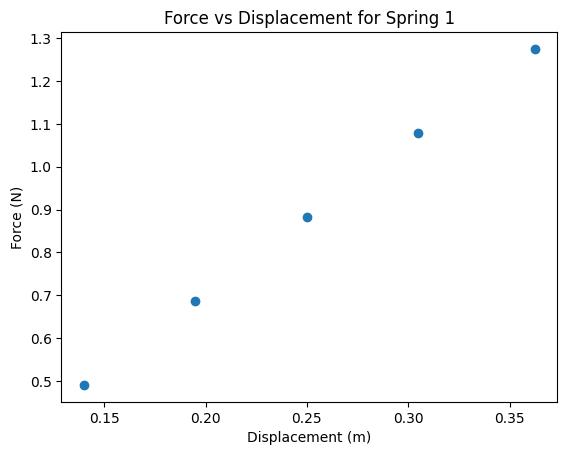

In [12]:
# Plotting the force vs displacement and fit a line for spring 1
np.polyfit(spring_1_displacement, spring_1_force, 1)
plt.plot(spring_1_displacement, spring_1_force, 'o')
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.title('Force vs Displacement for Spring 1')

In [11]:
# Calculating the spring constant for spring 1
